In [1]:
from tensorboard.backend.event_processing import event_accumulator

In [33]:
MODEL_NAME = "FEDformer"
DATA_NAME = "ETTh2"
ea = event_accumulator.EventAccumulator('/home/S22/workspace/HowMuchProgressMTS/ckpt/{0}/{1}/tensorboard'.format(MODEL_NAME, DATA_NAME))
ea.Reload()

In [34]:
train_MAE = []
val_MAE = []
test_MAE = []
for scalar in ea.Scalars("train_MAE"):
    train_MAE.append(scalar.value)
for scalar in ea.Scalars("val_MAE"):
    val_MAE.append(scalar.value)
for scalar in ea.Scalars("test_MAE"):
    test_MAE.append(scalar.value)

In [37]:
import matplotlib.pyplot as plt

def plot(train_metrics, valid_metrics, test_metrics, line_width: float = 6, font_size: int = 28, color="green", figure_size: tuple = (10, 7)):
    plt.rcParams['figure.figsize'] = figure_size
    plt.plot(range(len(train_metrics))[1:], train_metrics[1:], linewidth=line_width, color="#455064", label="Train MAE")
    plt.plot(range(len(valid_metrics))[1:], valid_metrics[1:], linewidth=line_width, color="#52b3c8", label="Valid MAE")
    plt.plot(range(len(test_metrics))[1:], test_metrics[1:], linewidth=line_width, color="#d33e90", label="Test MAE")
    plt.grid()
    plt.xlim(1, 50)
    plt.legend(fontsize=font_size, loc="upper right")
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    plt.ylim(3, 4)
    plt.savefig("MAE_{0}_{1}.pdf".format(MODEL_NAME, DATA_NAME), dpi=300, bbox_inches='tight')
    plt.show()
    plt.clf()

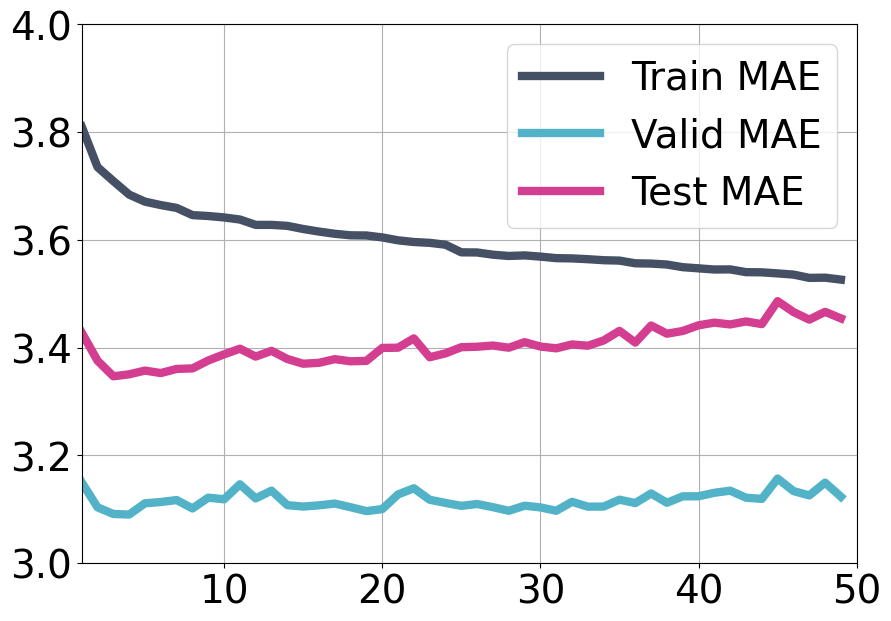

<Figure size 1000x700 with 0 Axes>

In [38]:
plot(train_MAE, val_MAE, test_MAE)